# Brain Stroke Analysis and Prediction

Data: 
- gender, age
- bmi, hypertension, heartdesease, avg_glucose_level, smoking_status
- ever_married, work_type, residence_type
- stroke (0 or 1)

TODO:
1. 对每个性状与是否中风的影响画图 - 条形图、饼图等
2. 显著性分析 - 某个性状对中风是否有影响
3. correlation map
4. 分类模型训练与准确度对比 - Naive Bayes (Bernoulli & Gaussian), Logistic Regression, K-Nearest Neighbor, Random Forest, Support Vector Machine)

Report: （找双列的报告模板）
1. Background
2. Dataset Discription
3. Data Analysis and Visualization
4. Model Training and Evaluation （每个模型放公式）
5. Conclusion

## Data Analysis

### Basic Exploration

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [12]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [11]:
df[categorical_columns].describe().T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


#### Count the values of categorical columns and including binary numerical columns.

binary columns (only includes 0 and 1, or two types):
- gender (female, male)
- hypertension (0, 1)
- heart_disease (0, 1)
- ever_married (Yes, No)
- Residence_type (Urban, Rural)
- stroke (0, 1)

In [66]:
df['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

In [59]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [64]:
df['hypertension'].value_counts()

hypertension
0    4611
1     498
Name: count, dtype: int64

In [65]:
df['heart_disease'].value_counts()

heart_disease
0    4833
1     276
Name: count, dtype: int64

In [63]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [60]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [61]:
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [62]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

### Correlation map

In [67]:
stroke_column = df['stroke']
df_encoded = pd.get_dummies(df.drop(columns=['stroke', 'id']), drop_first=True) # one hot encoding
df_encoded.insert(0, 'stroke', stroke_column)
correlation_matrix = df_encoded.corr()

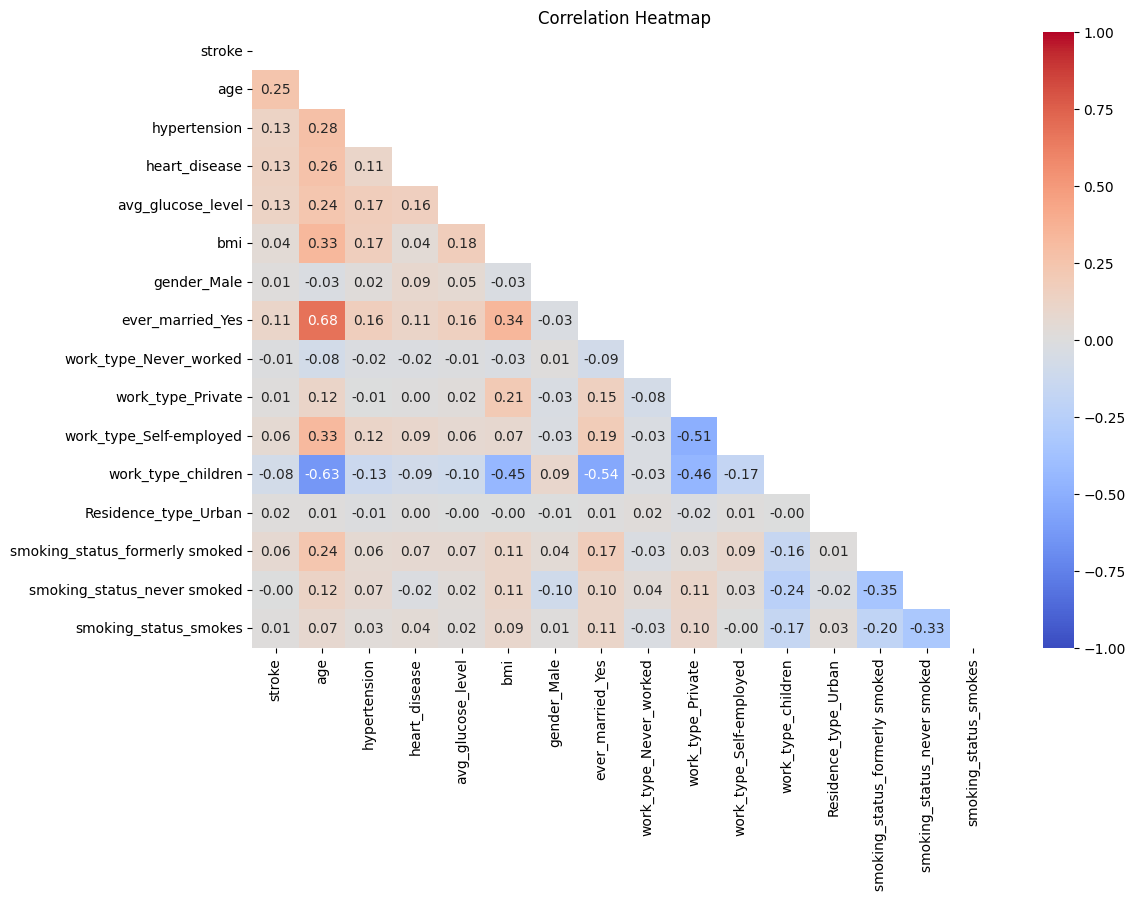

In [56]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # mask the diagonal

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, mask=mask) 
plt.title('Correlation Heatmap')
plt.show()

The first column of the correlation heatmap is the correlation of each feature with stroke.

In [57]:
correlation_with_stroke = correlation_matrix['stroke'].drop('stroke')
sorted_correlation = correlation_with_stroke.sort_values(ascending=False)
print("Correlation with stroke:")
print(sorted_correlation)

Correlation with stroke:
age                               0.245239
heart_disease                     0.134905
avg_glucose_level                 0.131991
hypertension                      0.127891
ever_married_Yes                  0.108299
smoking_status_formerly smoked    0.064683
work_type_Self-employed           0.062150
bmi                               0.042341
Residence_type_Urban              0.015415
work_type_Private                 0.011927
gender_Male                       0.009081
smoking_status_smokes             0.008920
smoking_status_never smoked      -0.004163
work_type_Never_worked           -0.014885
work_type_children               -0.083888
Name: stroke, dtype: float64


C:\Users\KEJIA\AppData\Local\Temp\ipykernel_2852\3028704252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlation.values, y=sorted_correlation.index, orient='h', palette=colors)


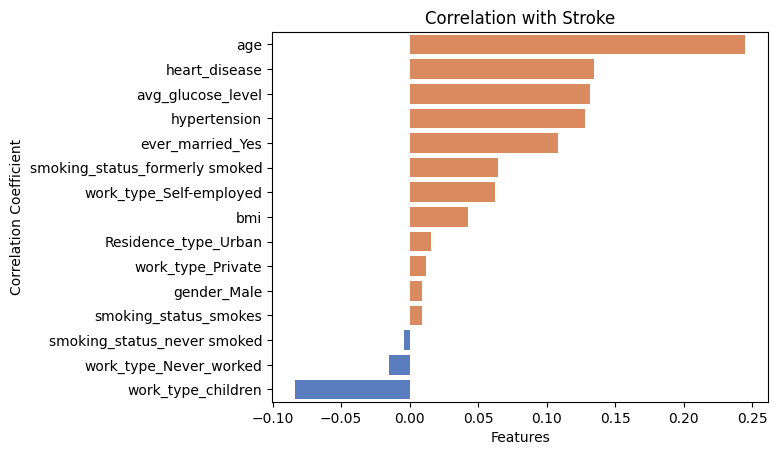

In [141]:
colors = [sns.color_palette("muted")[1] if value > 0 else sns.color_palette("muted")[0] for value in sorted_correlation]

sns.barplot(x=sorted_correlation.values, y=sorted_correlation.index, orient='h', palette=colors)
plt.title('Correlation with Stroke')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

### Analysis on Stroke Patients' Gender

In [34]:
df = df[df["gender"] != "Other"]

In [41]:
df_gender = df.groupby(["gender", "stroke"]).size().unstack(fill_value=0)
df_gender.columns = ["No Stroke", "Stroke"]
df_gender["Stroke Ratio"] = df_gender["Stroke"] / (df_gender["Stroke"] + df_gender["No Stroke"])
df_gender

,No Stroke,Stroke,Stroke Ratio
gender,,,
Female,2853,141,0.047094
Male,2007,108,0.051064


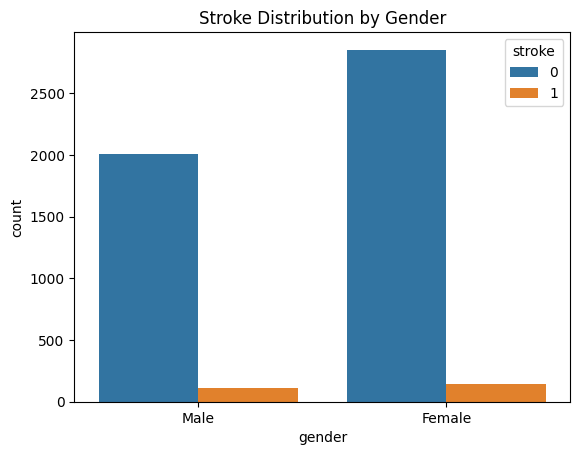

In [40]:
sns.countplot(x='gender', hue='stroke', data=df)
# plt.yscale('log')
plt.title('Stroke Distribution by Gender')
plt.show()

Chi-squared test: \
（性别和中风这两个变量是类别变量（categorical variables），因此更适合使用 卡方检验（Chi-squared test） 来进行显著性分析。）
- chi2_stat: 卡方统计量，用于衡量实际值和预期值之间的差异。
- p_value: 显著性水平，如果 p_value < 0.05，说明性别和中风之间有显著关系。
- dof: 自由度，等于 (行数 - 1) * (列数 - 1)。
- expected: 根据零假设计算的预期频数。

In [44]:
contingency_table = pd.crosstab(df['gender'], df['stroke'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

if p_value < 0.05:
    print("There is a significant relationship between gender and stroke.")
else:
    print("There is no significant relationship between gender and stroke.")

Chi2 Statistic: 0.340002536046177
P-Value: 0.5598277580669416
Degrees of Freedom: 1
Expected Frequencies: 
[[2848.07985907  145.92014093]
 [2011.92014093  103.07985907]]
There is no significant relationship between gender and stroke.


Proportion Test:\
用于比较两个群体中某一事件发生的比例是否相等，可以用Z-Test来进行比例检验。
- count: 每个性别中风的数量。
- nobs: 每个性别的总人数。
- proportions_ztest: 进行比例检验，返回 Z 统计量和 p 值。
- 如果 p-value < 0.05，表示性别和中风的比例差异显著；否则，表示差异不显著。
- 如果 Z-statistic 很大（比如绝对值大于 1.96），说明两组数据差异显著，拒绝零假设。
- 如果 Z-statistic 的值接近零，表示没有显著差异，支持零假设。

In [48]:
# ! pip install statsmodels

In [47]:
from statsmodels.stats.proportion import proportions_ztest
count = df.groupby('gender')['stroke'].sum()
nobs = df['gender'].value_counts()
stat, pval = proportions_ztest(count, nobs)
print(f"Z-statistic: {stat}, p-value: {pval}")

if pval < 0.05:
    print("There is a significant difference in stroke rates between genders.")
else:
    print("There is no significant difference in stroke rates between genders.")

Z-statistic: -0.6490565013589283, p-value: 0.5163018564037076
There is no significant difference in stroke rates between genders.


Conclusion: There is no significant difference in stroke rates between male and female.

### Analysis on Stroke Patients' Age

In [69]:
stroke_group = df[df['stroke'] == 1]['age']
non_stroke_group = df[df['stroke'] == 0]['age']

stroke_stats = stroke_group.describe().rename("Stroke")
non_stroke_stats = non_stroke_group.describe().rename("Non-Stroke")

age_stats = pd.concat([stroke_stats, non_stroke_stats], axis=1)
print(age_stats)

           Stroke   Non-Stroke
count  249.000000  4860.000000
mean    67.728193    41.974831
std     12.727419    22.293056
min      1.320000     0.080000
25%     59.000000    24.000000
50%     71.000000    43.000000
75%     78.000000    59.000000
max     82.000000    82.000000


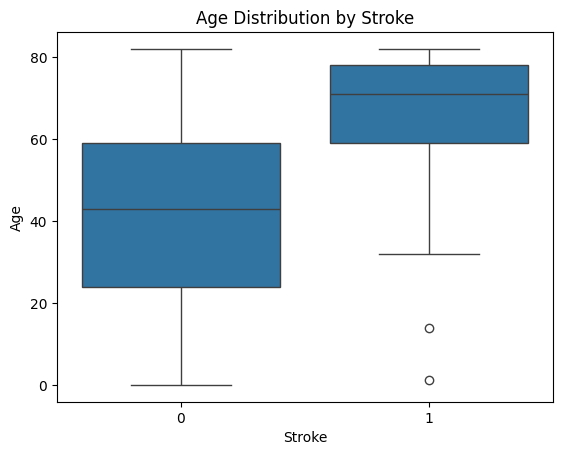

In [70]:
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

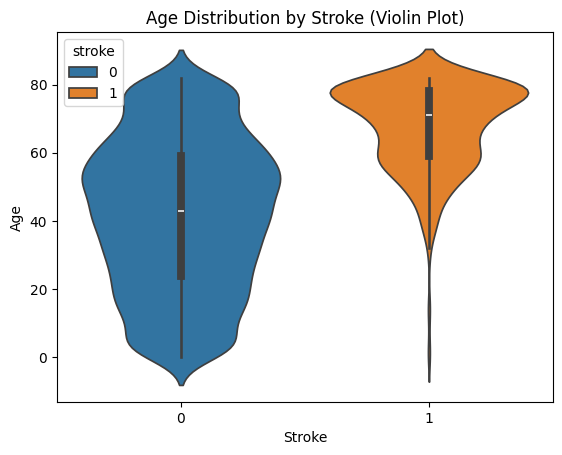

In [94]:
sns.violinplot(x='stroke', y='age', data=df, hue='stroke')
plt.title('Age Distribution by Stroke (Violin Plot)')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

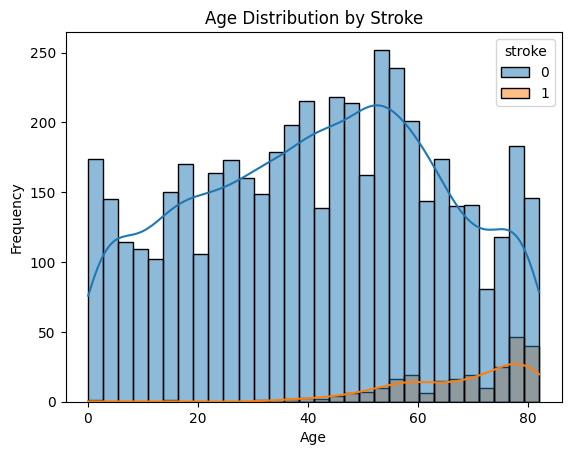

In [72]:
sns.histplot(data=df, x='age', hue='stroke', kde=True, bins=30)
plt.title('Age Distribution by Stroke')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

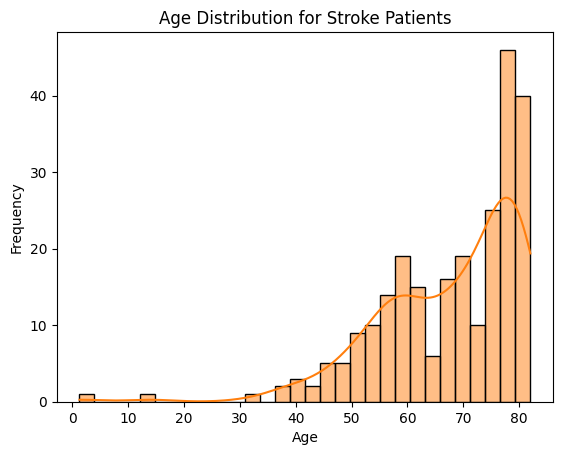

In [80]:
stroke_only = df[df['stroke'] == 1]
color = sns.color_palette()[1]

sns.histplot(data=stroke_only, x='age', kde=True, bins=30, color = color) 
plt.title('Age Distribution for Stroke Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

T-test

In [75]:
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(stroke_group, non_stroke_group)
print(f'T-statistic: {t_stat}, p-value: {p_val}')

if p_val < 0.05:
    print("There is a significant difference in age between the stroke and non-stroke groups.")
else:
    print("There is no significant difference in age between the stroke and non-stroke groups.")

T-statistic: 18.07760628336985, p-value: 7.435468822639662e-71
There is a significant difference in age between the stroke and non-stroke groups.


Analysis on age and gender

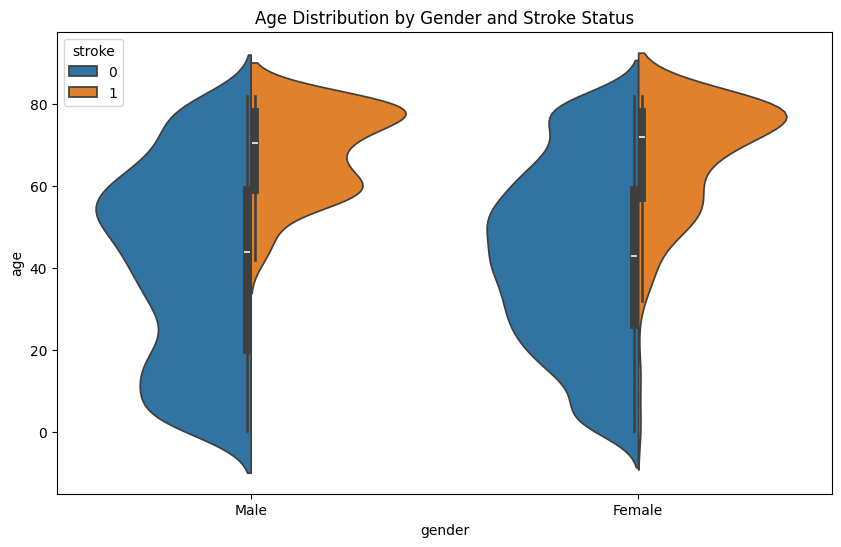

In [76]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="gender", y="age", hue="stroke", data=df, split=True)
plt.title("Age Distribution by Gender and Stroke Status")
plt.show()

Conclusion:
- There is significant relationship between age and gender.
- The average age of stroke patients is approximately 67.7 years, which is significantly higher than the average age 41.97 of non-stroke individuals.
- The majority of stroke cases occur in older age groups, particularly individuals aged 50 and above.
- There is a notable increase in stroke frequency with age, which peaks around the late 70s to early 80s.
- Younger age groups (below 40) show minimal stroke cases.

### Analysis on Relationship between Stroke and Smoking Status

In [96]:
df_smoke = df.groupby(["smoking_status", "stroke"]).size().unstack(fill_value=0)
df_smoke.columns = ["No Stroke", "Stroke"]
df_smoke["Stroke Ratio"] = df_smoke["Stroke"] / (df_smoke["Stroke"] + df_smoke["No Stroke"])
df_smoke

,No Stroke,Stroke,Stroke Ratio
smoking_status,,,
Unknown,1497,47,0.030440
formerly smoked,814,70,0.079186
never smoked,1802,90,0.047569
smokes,747,42,0.053232


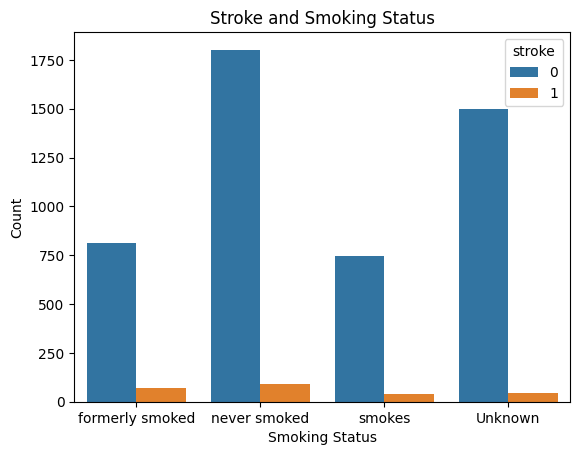

In [99]:
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Stroke and Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

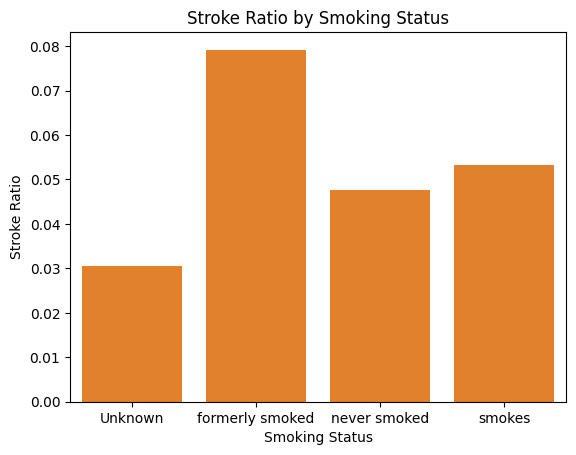

In [106]:
sns.barplot(x=df_smoke.index, y=df_smoke['Stroke Ratio'], color=sns.color_palette()[1])
plt.title('Stroke Ratio by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Stroke Ratio')
plt.show()

In [102]:
cross_tab = pd.crosstab(df['smoking_status'], df['stroke'])
print(cross_tab)

chi2, p, _, _ = stats.chi2_contingency(cross_tab)
print(f"Chi2: {chi2}, p-value: {p}")

# 根据p值得出结论
if p < 0.05:
    print("There is a significant relationship between smoking status and stroke.")
else:
    print("There is no significant relationship between smoking status and stroke.")

stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   814  70
never smoked     1802  90
smokes            747  42
Chi2: 29.22572707549827, p-value: 2.0077041756108317e-06
There is a significant relationship between smoking status and stroke.


这里出现了奇怪的现象：为什么“以前吸烟”比“吸烟”中风率更高呢？我又查看了correlation map，发现是因为“以前吸烟”和年龄的相关度更高，也就是“以前吸烟”的人大多年龄较大，而“吸烟”的人年龄较小。因此，看似是吸烟状态与中风有关，实际上是受了年龄的影响。这就是两个feature相关但没有直接因果关系，而是受了第三个变量的影响。

### Analysis on BMI and Stroke

In [107]:
stroke_group_bmi = df[df['stroke'] == 1]['bmi']
non_stroke_group_bmi = df[df['stroke'] == 0]['bmi']

stroke_stats_bmi = stroke_group_bmi.describe().rename("Stroke")
non_stroke_stats_bmi = non_stroke_group_bmi.describe().rename("Non-Stroke")

bmi_stats = pd.concat([stroke_stats_bmi, non_stroke_stats_bmi], axis=1)
print(bmi_stats)

           Stroke   Non-Stroke
count  209.000000  4699.000000
mean    30.471292    28.824431
std      6.329452     7.908573
min     16.900000    10.300000
25%     26.400000    23.400000
50%     29.700000    28.000000
75%     33.700000    33.100000
max     56.600000    97.600000


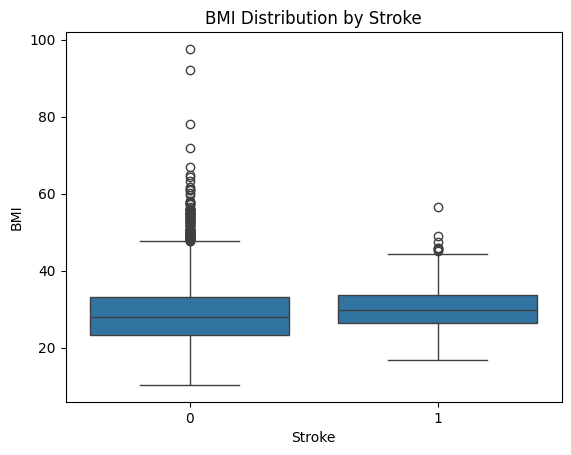

In [108]:
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

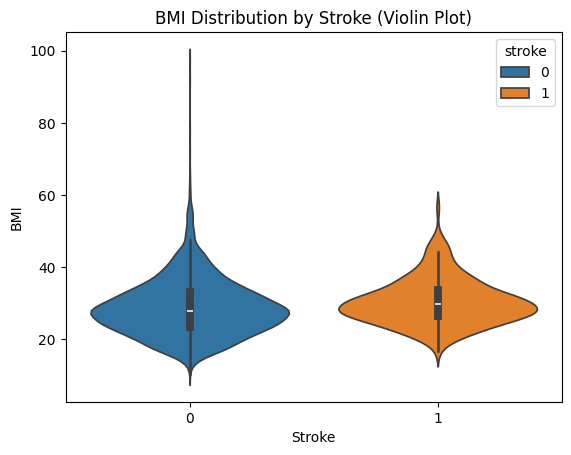

In [110]:
sns.violinplot(x='stroke', y='bmi', data=df, hue="stroke")
plt.title('BMI Distribution by Stroke (Violin Plot)')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

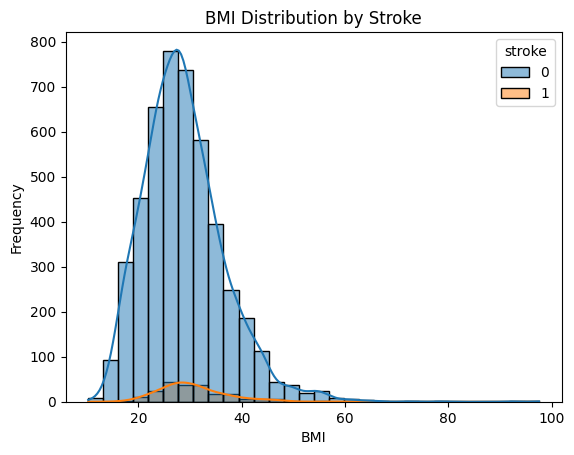

In [112]:
sns.histplot(data=df, x='bmi', hue='stroke', kde=True, bins=30)
plt.title('BMI Distribution by Stroke')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

C:\Users\KEJIA\AppData\Local\Temp\ipykernel_2852\754259379.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  }).groupby('bmi_category')['stroke'].value_counts(normalize=True).unstack().fillna(0)


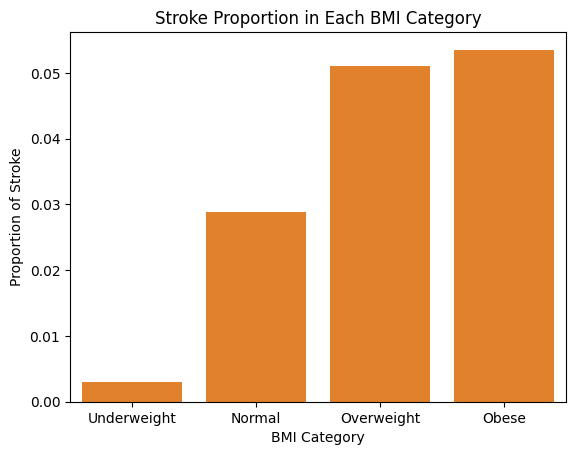

In [120]:
bmi_bins = [0, 18.5, 24.9, 29.9, 40]  # BMI<18.5, 18.5-24.9, 25-29.9, 30-40
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
bmi_category = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

bmi_group = pd.DataFrame({
    'stroke': df['stroke'],
    'bmi_category': bmi_category
}).groupby('bmi_category')['stroke'].value_counts(normalize=True).unstack().fillna(0)
bmi_group['stroke_ratio'] = bmi_group[1]

sns.barplot(x=bmi_group.index, y=bmi_group['stroke_ratio'], color=sns.color_palette()[1])
plt.title('Stroke Proportion in Each BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Proportion of Stroke')
plt.show()

C:\Users\KEJIA\AppData\Local\Temp\ipykernel_2852\4063536753.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  }).groupby('bmi_category')['stroke'].value_counts(normalize=True).unstack().fillna(0)


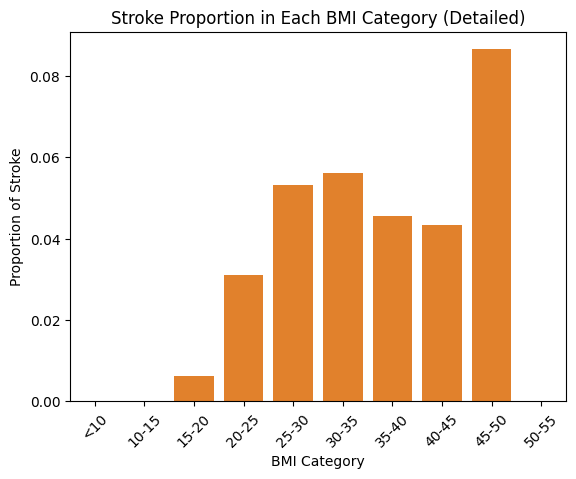

In [123]:
bmi_bins = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
bmi_labels = ['<10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55']
bmi_category = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

bmi_group = pd.DataFrame({
    'stroke': df['stroke'],
    'bmi_category': bmi_category
}).groupby('bmi_category')['stroke'].value_counts(normalize=True).unstack().fillna(0)
bmi_group['stroke_ratio'] = bmi_group[1]

sns.barplot(x=bmi_group.index, y=bmi_group['stroke_ratio'], color=sns.color_palette()[1])
plt.title('Stroke Proportion in Each BMI Category (Detailed)')
plt.xlabel('BMI Category')
plt.ylabel('Proportion of Stroke')
plt.xticks(rotation=45)
plt.show()

In [111]:
t_stat, p_val = ttest_ind(stroke_group_bmi.dropna(), non_stroke_group_bmi.dropna())
print(f'T-statistic: {t_stat}, p-value: {p_val}')

if p_val < 0.05:
    print("There is a significant difference in BMI between the stroke and non-stroke groups.")
else:
    print("There is no significant difference in BMI between the stroke and non-stroke groups.")

T-statistic: 2.968365485973203, p-value: 0.003008355955526417
There is a significant difference in BMI between the stroke and non-stroke groups.


Conclusion:
- There is a significant difference in BMI between the stroke and non-stroke groups.
- The average BMI for the stroke group is 30.47, while for the non-stroke group, it is 28.82.
- Individuals with a higher BMI (such as in the overweight and obese categories) are more likely to experience a stroke, while those with a normal or lower BMI are less likely.

## Model Training and Evaluation